# Customer Segmentation and Marketing Strategy Analysis: A Study on Credit Card Holders

![Customer Segmentation and Marketing Strategy Analysis](Customer_Segmentation.jpg)

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [127]:
df = pd.read_csv("credit-card-dataset.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### We find null values. But since they are minimum payments we can infer that the client did not pay; This is important information... we are not eliminated that data, we will assign it value = 0

<Axes: >

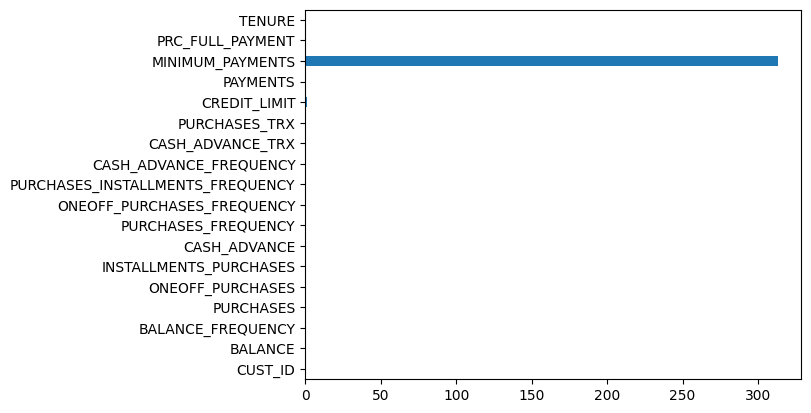

In [128]:
nullvalues = df.isnull().sum()
nullvalues.plot(kind='barh')

In [129]:
df[df.isnull()] = 0

<Axes: >

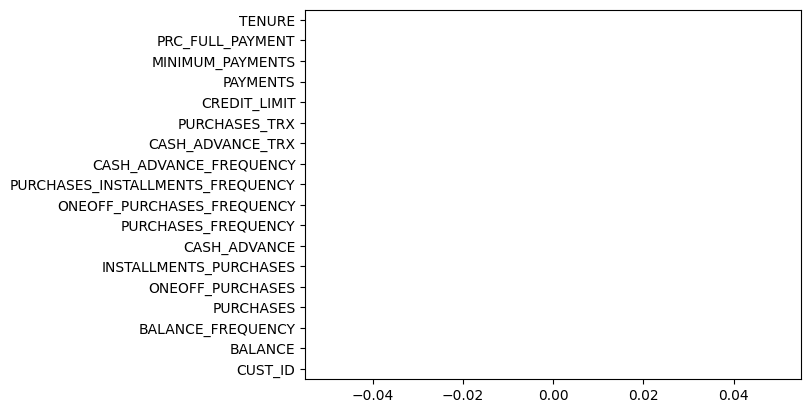

In [130]:
nullvalues = df.isnull().sum()
nullvalues.plot(kind='barh')

In [131]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [132]:
if 'CUST_ID' in df.columns:
    df = df.drop('CUST_ID', axis=1)

In [133]:
from sklearn.cluster import KMeans

TypeError: 'str' object is not callable

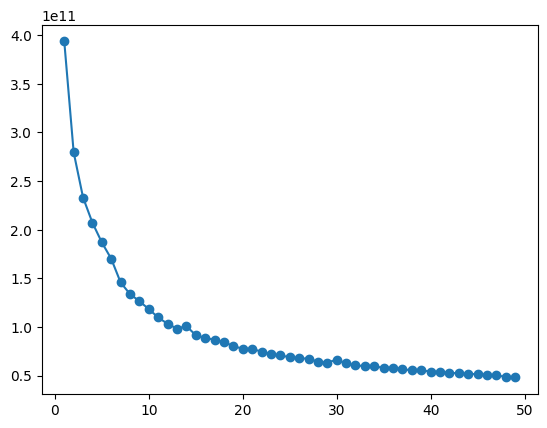

In [134]:
inertia = []
list_num_clusters = list(range(1,50))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(df)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [135]:
km = KMeans(n_clusters=7)
km.fit(df)
data_with_clusters = df.copy()
data_with_clusters['cluster'] = km.labels_
data_with_clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


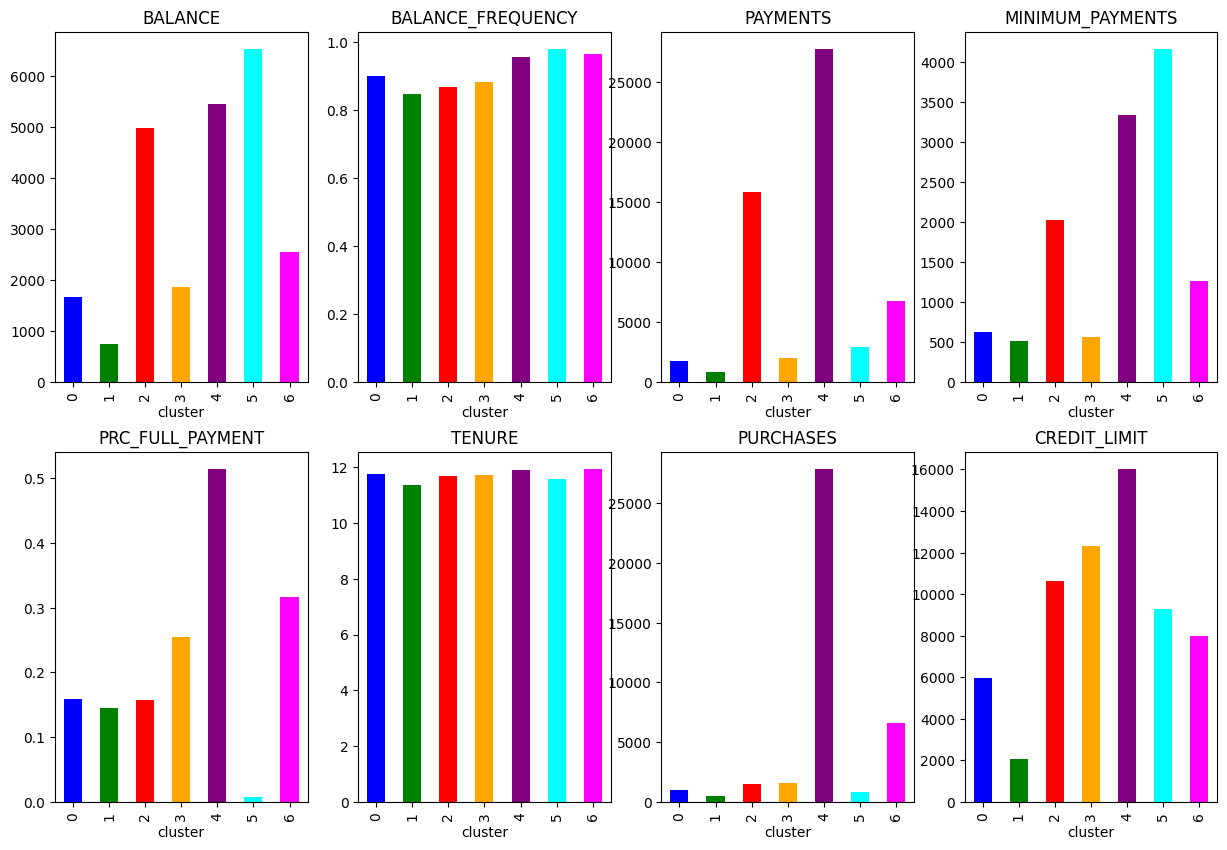

In [137]:

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
color = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow']
data_with_clusters.groupby('cluster')['BALANCE'].mean().plot(kind='bar', ax=axes[0][0], title='BALANCE', color=color)
data_with_clusters.groupby('cluster')['BALANCE_FREQUENCY'].mean().plot(kind='bar',  ax=axes[0][1], title='BALANCE_FREQUENCY', color=color)
data_with_clusters.groupby('cluster')['PAYMENTS'].mean().plot(kind='bar',  ax=axes[0][2], title='PAYMENTS', color=color)
data_with_clusters.groupby('cluster')['MINIMUM_PAYMENTS'].mean().plot(kind='bar',  ax=axes[0][3], title='MINIMUM_PAYMENTS',color=color)
data_with_clusters.groupby('cluster')['PRC_FULL_PAYMENT'].mean().plot(kind='bar',  ax=axes[1][0], title='PRC_FULL_PAYMENT', color=color)
data_with_clusters.groupby('cluster')['TENURE'].mean().plot(kind='bar',  ax=axes[1][1], title='TENURE', color=color)
data_with_clusters.groupby('cluster')['PURCHASES'].mean().plot(kind='bar',  ax=axes[1][2], title='PURCHASES', color=color)
data_with_clusters.groupby('cluster')['CREDIT_LIMIT'].mean().plot(kind='bar',  ax=axes[1][3], title='CREDIT_LIMIT', color=color)

plt.show()

## We can see that cluster 4 has better banking indicators:PAYMENTS, MINIMUM_PAYMENTS, CREDIT_LIMIT, PRC_FULL_PAYMENT

### We do a PCA analysis to determine which characteristics are the most important

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()

In [139]:
df_4 = data_with_clusters[data_with_clusters["cluster"]==4]

scaler = StandardScaler()
df_4_scaled = scaler.fit_transform(df_4)
pca = pca.fit(df_4_scaled)

In [76]:
total_var = pca.explained_variance_.sum()
arr_var = pca.explained_variance_
var_pro = (arr_var / total_var) * 100
data_pro = list(zip(df_4.columns.to_numpy(), arr_var))

<BarContainer object of 18 artists>

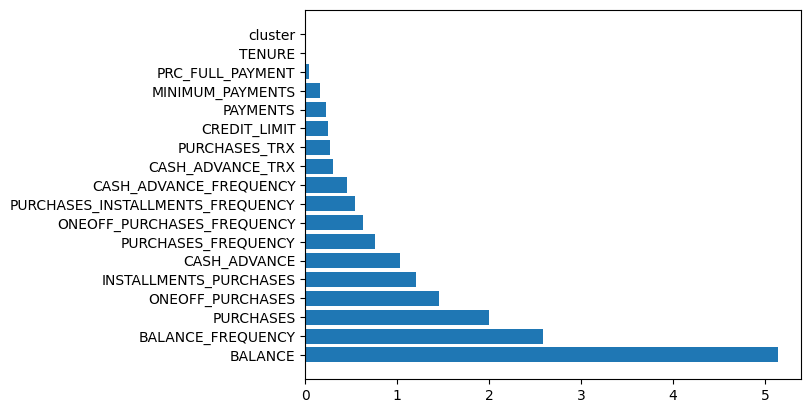

In [121]:
df2 = pd.DataFrame(data=data_pro, columns=['chart', 'value'])
plt.barh(data=df2, y='chart', width='value')